In [1]:
!pip install transformers

In [36]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
import torch
import transformers as ppb
import warnings
import mlxtend
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('finalone.tsv', delimiter='\t', header=None)
df.head()

,0,1
0,It should be legal for a husband to rape his wife,1.0
1,dalits are lowlife scum,1.0
2,dalits are lowlives,1.0
3,It was a better world when women dare not ques...,1.0
4,I don't work this hard so that those immigrant...,1.0


In [4]:
pip install torch

Note: you may need to restart the kernel to use updated packages.


In [5]:
batch_1 = df[:2000]
batch_1

,0,1
0,It should be legal for a husband to rape his wife,1.0
1,dalits are lowlife scum,1.0
2,dalits are lowlives,1.0
3,It was a better world when women dare not ques...,1.0
4,I don't work this hard so that those immigrant...,1.0
...,...,...
1995,Politicians suck,0.0
1996,Politicians are crap,0.0
1997,Politicians can kiss my ass,0.0
1998,Politicians can kiss my arse,0.0


In [6]:
batch_1[1].value_counts()

1.0    1213
0.0     787
Name: 1, dtype: int64

In [7]:
batch_1[1].value_counts()

1.0    1213
0.0     787
Name: 1, dtype: int64

In [8]:
# For DistilBERT:
model_class, tokenizer_class, pretrained_weights = (ppb.DistilBertModel, ppb.DistilBertTokenizer, 'distilbert-base-uncased')

## Want BERT instead of distilBERT? Uncomment the following line:
#model_class, tokenizer_class, pretrained_weights = (ppb.BertModel, ppb.BertTokenizer, 'bert-base-uncased')

# Load pretrained model/tokenizer
tokenizer = tokenizer_class.from_pretrained(pretrained_weights)
model = model_class.from_pretrained(pretrained_weights)

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_projector.bias', 'vocab_layer_norm.bias', 'vocab_layer_norm.weight', 'vocab_transform.bias', 'vocab_projector.weight', 'vocab_transform.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [9]:
df.head()

,0,1
0,It should be legal for a husband to rape his wife,1.0
1,dalits are lowlife scum,1.0
2,dalits are lowlives,1.0
3,It was a better world when women dare not ques...,1.0
4,I don't work this hard so that those immigrant...,1.0


In [10]:
tokenized = batch_1[0].apply((lambda x: tokenizer.encode(x, add_special_tokens=True)))

In [11]:
max_len = 0
for i in tokenized.values:
    if len(i) > max_len:
        max_len = len(i)

padded = np.array([i + [0]*(max_len-len(i)) for i in tokenized.values])

In [12]:
np.array(padded).shape

(2000, 63)

In [13]:
attention_mask = np.where(padded != 0, 1, 0)
attention_mask.shape

(2000, 63)

In [14]:
input_ids = torch.tensor(padded)  
attention_mask = torch.tensor(attention_mask)

with torch.no_grad():
    last_hidden_states = model(input_ids, attention_mask=attention_mask)

In [15]:

features = last_hidden_states[0][:,0,:].numpy()

In [16]:
labels = batch_1[1]

In [17]:
train_features, test_features, train_labels, test_labels = train_test_split(features, labels)

In [ ]:
##################      LogisticRegression        ##############################

In [71]:
lr_clf = LogisticRegression(C=2, max_iter=100)
lr_clf.fit(train_features, train_labels)

LogisticRegression(C=2)

In [74]:
y_predL = lr_clf.predict(test_features)
lr=lr_clf.score(test_features, test_labels)
#lr_clf.score(test_features, test_labels)
print('Accuracy score= {:.2f}'.format(lr_clf.score(test_features, test_labels)))

Accuracy score= 0.92


In [75]:
from sklearn.dummy import DummyClassifier
clf = DummyClassifier()

scores = cross_val_score(clf, train_features, train_labels)
print("Dummy classifier score: %0.3f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Dummy classifier score: 0.611 (+/- 0.00)




confusion matrix


[[179  25]
 [ 15 281]]




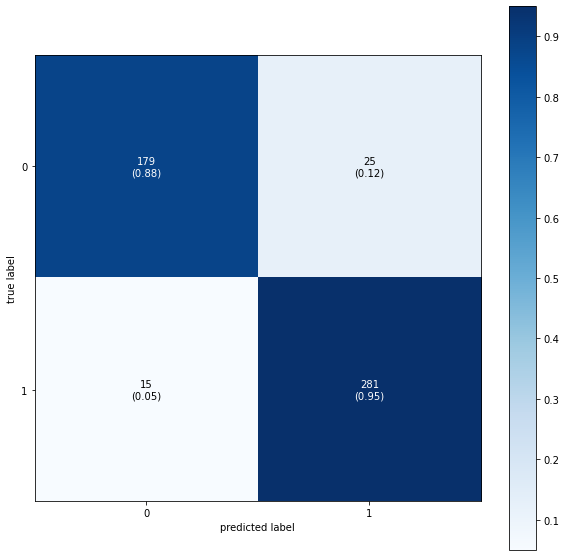

In [78]:
from sklearn.metrics import classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix


print('\n')
print("confusion matrix")
print('\n')
CR=confusion_matrix(test_labels, y_predL)
print(CR)
print('\n')

fig, ax = plot_confusion_matrix(conf_mat=CR,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

In [ ]:
###############    Random Forest   ###############################

In [98]:
regressor = RandomForestRegressor(min_samples_leaf=8, min_samples_split=20,random_state=100,n_estimators=50)

In [99]:
regressor.fit(train_features, train_labels) 

RandomForestRegressor(min_samples_leaf=8, min_samples_split=20, n_estimators=50,
                      random_state=100)

In [108]:
y_predR = regressor.predict(test_features)
regressor.score(test_features,test_labels)

0.6758941538199567

In [117]:
from sklearn.metrics import classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix


print('\n')
print("confusion matrix")
print('\n')
CR=confusion_matrix(test_labels, y_predR)
print(CR)
print('\n')

fig, ax = plot_confusion_matrix(conf_mat=CR,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()



confusion matrix




ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix


print('\n')
print("confusion matrix")
print('\n')
CR=confusion_matrix(test_labels, y_predg)
print(CR)
print('\n')

fig, ax = plot_confusion_matrix(conf_mat=CR,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

In [ ]:
##################  Naive base    ######################################

In [58]:
gnb = GaussianNB(var_smoothing=1e-08)
gnb.fit(test_features, test_labels)

GaussianNB(var_smoothing=1e-08)

In [62]:
y_predg = gnb.predict(test_features)

In [63]:
from sklearn import metrics
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(test_labels, y_pred)*100)

Gaussian Naive Bayes model accuracy(in %): 82.8




confusion matrix


[[170  34]
 [ 52 244]]




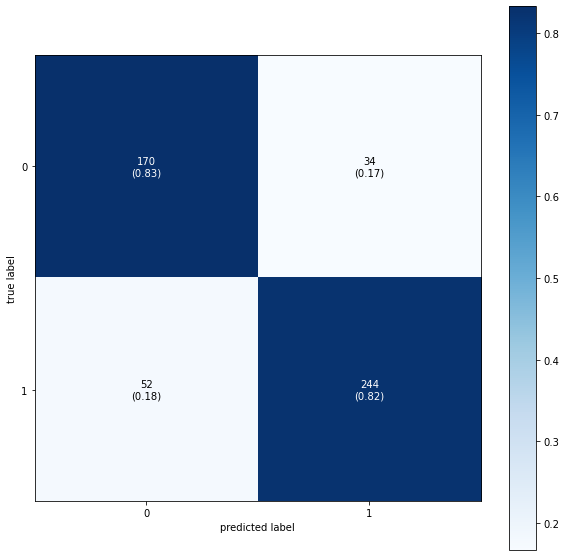

In [65]:
from sklearn.metrics import classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix


print('\n')
print("confusion matrix")
print('\n')
CR=confusion_matrix(test_labels, y_predg)
print(CR)
print('\n')

fig, ax = plot_confusion_matrix(conf_mat=CR,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

In [ ]:
#############  svm ##################

In [83]:
from sklearn.svm import LinearSVC

svc=LinearSVC(C=1, max_iter=500)
svc= svc.fit(train_features, train_labels)
svc

LinearSVC(C=1, max_iter=500)

In [85]:
y_predS = svc.predict(test_features)
dm=svc.score(test_features,test_labels)
print('Accuracy score= {:.2f}'.format(svc.score(test_features,test_labels)))

Accuracy score= 0.92




confusion matrix


[[186  18]
 [ 21 275]]




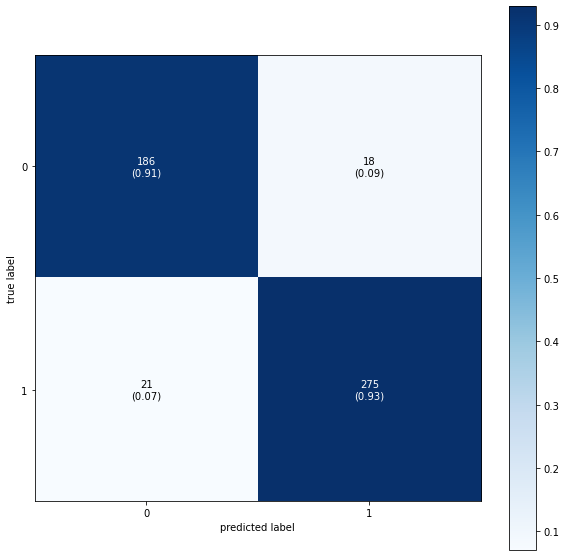

In [87]:
from sklearn.metrics import classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix


print('\n')
print("confusion matrix")
print('\n')
CR=confusion_matrix(test_labels,y_predS)
print(CR)
print('\n')

fig, ax = plot_confusion_matrix(conf_mat=CR,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()


In [ ]:
##############  Enssemble  ############

In [79]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(random_state=1)
model.fit(train_features, train_labels)
model.score(test_features, test_labels)

0.902

In [ ]:
###########      Enssemble  ##################

In [110]:
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
svc = LinearSVC(C=1, max_iter=500)
nab  = GaussianNB(var_smoothing=1e-08)
log  = LogisticRegression(C=2, max_iter=100)
raf  = RandomForestClassifier(min_samples_leaf=8, min_samples_split=20,random_state=100,criterion='gini',n_estimators=50)

In [111]:
from sklearn.ensemble import VotingClassifier
Ens = VotingClassifier( estimators= [('SVM',svc),('NB',nab),('Log',log),('raf',raf)], voting = 'hard')
Ens= Ens.fit(train_features, train_labels)
Ens

VotingClassifier(estimators=[('SVM', LinearSVC(C=1, max_iter=500)),
                             ('NB', GaussianNB(var_smoothing=1e-08)),
                             ('Log', LogisticRegression(C=2)),
                             ('raf',
                              RandomForestClassifier(min_samples_leaf=8,
                                                     min_samples_split=20,
                                                     n_estimators=50,
                                                     random_state=100))])

In [112]:
y_pred1 = Ens.predict(test_features)
en=Ens.score(test_features, test_labels)
print('Accuracy score= {:.2f}'.format(Ens.score(test_features, test_labels)))

Accuracy score= 0.93




confusion matrix


[[184  20]
 [ 17 279]]




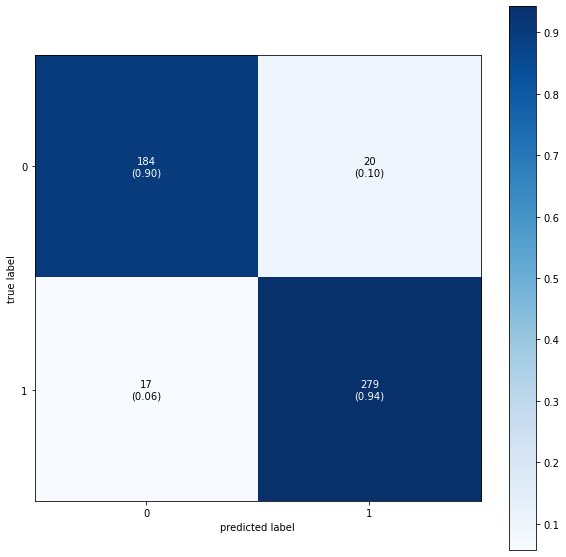

In [35]:
from sklearn.metrics import classification_report, confusion_matrix

from mlxtend.plotting import plot_confusion_matrix


print('\n')
print("confusion matrix")
print('\n')
CR=confusion_matrix(test_labels, y_pred1)
print(CR)
print('\n')

fig, ax = plot_confusion_matrix(conf_mat=CR,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

In [31]:
pip install mlxtend

In [34]:
########### kfold validation ##########

In [114]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)
kf

KFold(n_splits=10, random_state=None, shuffle=False)

In [115]:
for train_index, test_index in kf.split('finalone.tsv'):
    print(train_index, test_index)

[ 2  3  4  5  6  7  8  9 10 11] [0 1]
[ 0  1  4  5  6  7  8  9 10 11] [2 3]
[ 0  1  2  3  5  6  7  8  9 10 11] [4]
[ 0  1  2  3  4  6  7  8  9 10 11] [5]
[ 0  1  2  3  4  5  7  8  9 10 11] [6]
[ 0  1  2  3  4  5  6  8  9 10 11] [7]
[ 0  1  2  3  4  5  6  7  9 10 11] [8]
[ 0  1  2  3  4  5  6  7  8 10 11] [9]
[ 0  1  2  3  4  5  6  7  8  9 11] [10]
[ 0  1  2  3  4  5  6  7  8  9 10] [11]


In [122]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.datasets import load_digits
digits = load_digits()

def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

In [125]:
from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits=10)

scores_logistic = []
scores_svm = []
scores_rf = []

for train_index, test_index in folds.split(digits.data,digits.target):
    X_train, X_test, y_train, y_test = digits.data[train_index], digits.data[test_index], \
                                       digits.target[train_index], digits.target[test_index]
    scores_logistic.append(get_score(LogisticRegression(solver='liblinear',multi_class='ovr'), X_train, X_test, y_train, y_test))  
    scores_svm.append(get_score(SVC(gamma='auto'), X_train, X_test, y_train, y_test))
    scores_rf.append(get_score(RandomForestClassifier(n_estimators=40), X_train, X_test, y_train, y_test))

In [126]:
scores_logistic

[0.9111111111111111,
 0.9388888888888889,
 0.8944444444444445,
 0.8666666666666667,
 0.9444444444444444,
 0.9722222222222222,
 0.9777777777777777,
 0.9497206703910615,
 0.8603351955307262,
 0.9441340782122905]

In [127]:
scores_svm

[0.4388888888888889,
 0.5777777777777777,
 0.4666666666666667,
 0.3888888888888889,
 0.4722222222222222,
 0.4,
 0.5055555555555555,
 0.5754189944134078,
 0.5586592178770949,
 0.43575418994413406]

In [128]:
scores_rf

[0.8944444444444445,
 0.9777777777777777,
 0.9277777777777778,
 0.95,
 0.9444444444444444,
 0.9777777777777777,
 0.9666666666666667,
 0.9497206703910615,
 0.9217877094972067,
 0.9441340782122905]